In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import rasterio
import numpy as np
import netCDF4 as nc
import wget
import requests, zipfile, os , io

In [6]:
#read csv file
fname = "era5_matched_ar_events"
f_path = '../data/'+fname+".csv"
df = pd.read_csv(f_path)
len(df)

53

In [7]:
#drop unnamed and event_start_time columns
df = df.drop(columns = ['Unnamed: 0','event_start_time'], axis=1)

In [8]:
df.head()

,max_ivt,duration,area,max_prcp,centroid_lat_min,centroid_lat_max,validation_scale,snow_no_snow
0,939.812500,19,2933709.50,37.431418,37.516745,39.561999,1,0
1,904.690430,43,2101863.25,37.576498,36.974140,44.478376,2,0
2,1504.083984,13,3758570.50,75.277734,36.005787,37.594911,1,1
3,685.914795,19,3123314.50,75.277734,38.469532,41.099843,1,0
4,2071.340820,25,6741418.00,162.604144,22.585240,33.801482,1,0


<Axes: >

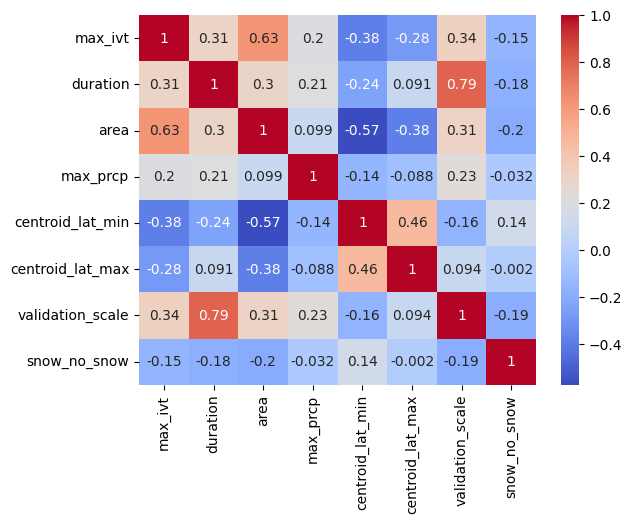

In [10]:
#heatmap
import seaborn as sns

variables_corr = df.corr()
sns.heatmap(variables_corr, cmap="coolwarm", annot=True)

In [12]:
variables_corr

,max_ivt,duration,area,max_prcp,centroid_lat_min,centroid_lat_max,validation_scale,snow_no_snow
max_ivt,1.000000,0.309155,0.626301,0.198011,-0.382592,-0.280643,0.335029,-0.153526
duration,0.309155,1.000000,0.304296,0.210371,-0.240188,0.091338,0.791505,-0.176859
area,0.626301,0.304296,1.000000,0.098807,-0.572215,-0.383298,0.314096,-0.197851
max_prcp,0.198011,0.210371,0.098807,1.000000,-0.142403,-0.087652,0.234092,-0.032078
centroid_lat_min,-0.382592,-0.240188,-0.572215,-0.142403,1.000000,0.460674,-0.155308,0.143452
centroid_lat_max,-0.280643,0.091338,-0.383298,-0.087652,0.460674,1.000000,0.093554,-0.001994
validation_scale,0.335029,0.791505,0.314096,0.234092,-0.155308,0.093554,1.000000,-0.189472
snow_no_snow,-0.153526,-0.176859,-0.197851,-0.032078,0.143452,-0.001994,-0.189472,1.000000


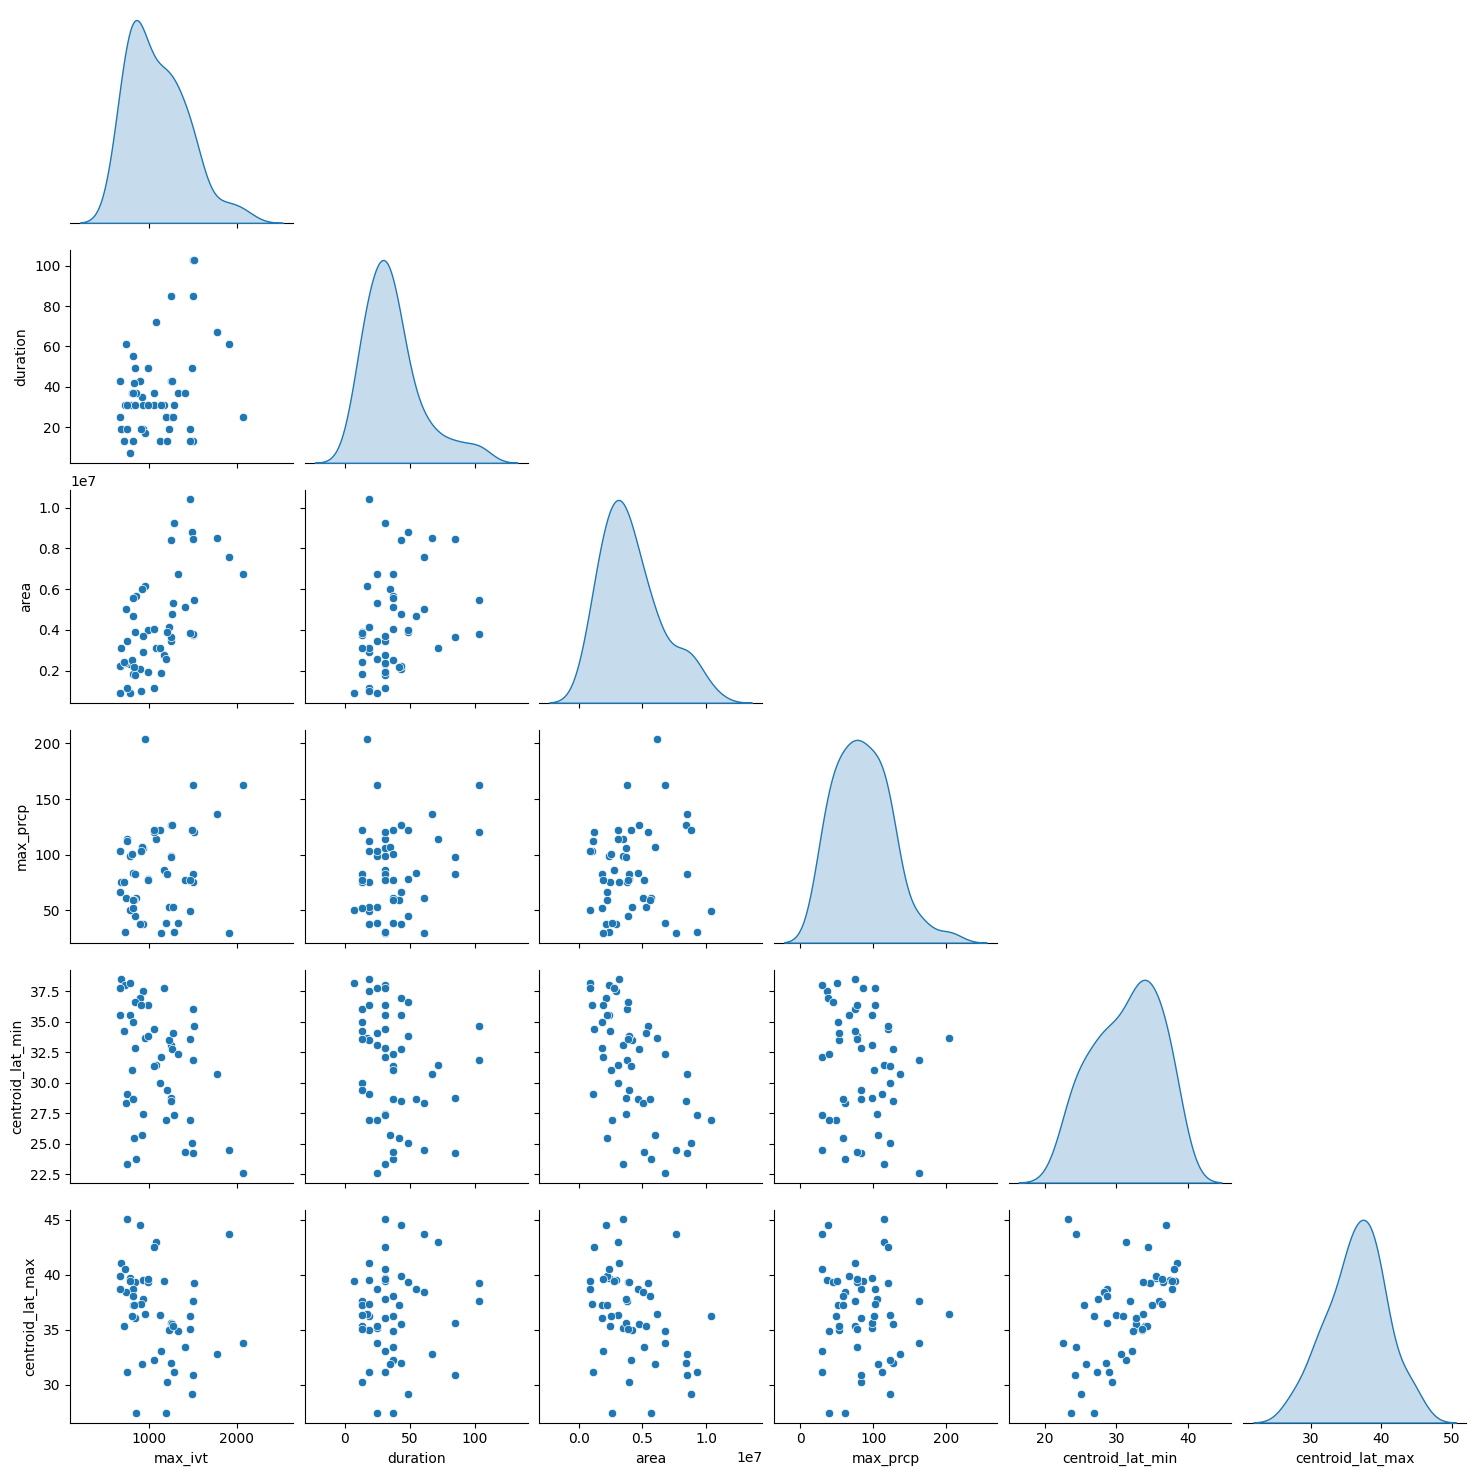

In [16]:
#correllogram
sns.pairplot(df.drop(columns=['validation_scale', 'snow_no_snow']), diag_kind='kde', corner=True)
plt.show()